<a href="https://colab.research.google.com/github/maximebarbier01/blinkit-sales-analysis/blob/main/marketing_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 LIBRAIRIES

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# 🛢️ IMPORT DATA

In [7]:
df = pd.read_csv('/content/blinkit_marketing_performance_clean.csv',delimiter=";")
df.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


# KPI

In [8]:
# Creation of a new df_kpi dataframe
df_kpi = df

# Click rate calculation
df_kpi['click_rate'] = (df_kpi['clicks'] / df_kpi['impressions']).round(2)

# Conversions rate calculation
df_kpi['conv_rate'] = (df_kpi.conversions / df_kpi.impressions).round(2)

# Cost per thousand calculation (CPM)
df_kpi['CPM'] = df_kpi.spend / df_kpi.impressions * 1000

# CAC calculation
df_kpi['CAC'] = (df_kpi.spend / df_kpi.conversions).round(2)
df_kpi

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas,click_rate,conv_rate,CPM,CAC
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60,0.05,0.02,457.460064,18.36
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98,0.13,0.01,1148.112102,100.14
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95,0.05,0.01,645.212493,58.00
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84,0.52,0.08,3249.139013,42.13
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22,0.11,0.01,402.815114,53.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,381623,Membership Drive,2023-03-17,New Users,Email,8331,809,92,2363.07,3710.79,1.64,0.10,0.01,283.647821,25.69
5396,493317,Category Promotion,2023-03-17,Premium,Social Media,5216,860,34,3922.53,7701.25,2.01,0.16,0.01,752.018788,115.37
5397,879292,App Push Notification,2023-03-17,All,App,8480,734,20,1990.75,6650.41,3.98,0.09,0.00,234.758255,99.54
5398,461129,Email Campaign,2023-03-17,New Users,Email,3569,568,10,4246.47,5880.42,2.50,0.16,0.00,1189.820678,424.65


In [9]:
df_kpi['target_audience'].value_counts(normalize=True)

,proportion
target_audience,
New Users,0.251111
Premium,0.250926
Inactive,0.249444
All,0.248519


Note: ROAS is a very good performance indicator. Let's see how it breaks down by date and by channel to understand which channel is the most profitable and how it evolves over time.

# MONTHLY ROAS BY CHANNEL

In [10]:
# Creating a pivot table with date as index and channel as column
roas_channel_pivot = df_kpi.pivot_table(values=["roas","spend"],columns='channel',index='date',aggfunc='sum')
roas_channel_pivot

roas                                spend                      \
channel       App  Email    SMS Social Media       App     Email       SMS   
date                                                                         
2023-03-17   6.82   7.71   3.82         8.98   6484.09   8931.97   1090.49   
2023-03-18   9.01   2.88    NaN         9.87  11376.84   3217.48       NaN   
2023-03-19   8.25   6.41   6.96         3.32   9105.78   5714.53   6332.95   
2023-03-20   3.46   5.96  15.55          NaN   1400.73   3544.77  26119.48   
2023-03-21   9.06   5.55   5.57         3.00  11643.16   8071.53   6035.79   
...           ...    ...    ...          ...       ...       ...       ...   
2024-11-01   5.48  12.38   6.62          NaN   6028.88  17363.83   3858.44   
2024-11-02  10.01   1.84  10.80         3.75   9263.82   2202.62  10140.27   
2024-11-03   1.86  15.81    NaN         4.62   4337.91  20031.12       NaN   
2024-11-04   9.66    NaN   5.65         6.37  10025.65       NaN   7074.82   
2024-11-05  10.47   7.31   4.54         3.92   8652.97  10997.98   8431.43   

                         
channel    Social Media  
date                     
2023-03-17      9119.55  
2023-03-18     12568.77  
2023-03-19      6753.07  
2023-03-20          NaN  
2023-03-21      1266.57  
...                 ...  
2024-11-01          NaN  
2024-11-02      3819.45  
2024-11-03      5076.65  
2024-11-04      6964.56  
2024-11-05      1457.88  

[600 rows x 8 columns]

In [11]:
# Transform date column into date type
roas_channel_pivot.index = pd.to_datetime(roas_channel_pivot.index, format="%Y-%m-%d", errors='coerce')

In [38]:
# Change roas_channel_pivot into monthly results

roas_channel_pivot_monthly = roas_channel_pivot.resample("ME").sum()
roas_channel_pivot_monthly.head()

roas                                   spend             \
channel        App   Email     SMS Social Media        App      Email   
date                                                                    
2023-03-31   86.44  113.69   97.34        80.48   99052.54  121242.67   
2023-04-30  204.11  160.08  172.92       182.79  250133.78  166883.13   
2023-05-31  182.72  190.23  186.11       192.38  215824.88  211601.98   
2023-06-30  196.60  206.94  172.57       182.00  194232.42  228254.99   
2023-07-31  186.51  188.73  165.70       192.63  211062.49  240422.02   

                                    
channel           SMS Social Media  
date                                
2023-03-31  112979.06     78059.04  
2023-04-30  202672.73    211017.06  
2023-05-31  219519.94    212940.58  
2023-06-30  181871.82    204701.32  
2023-07-31  182876.05    213440.04

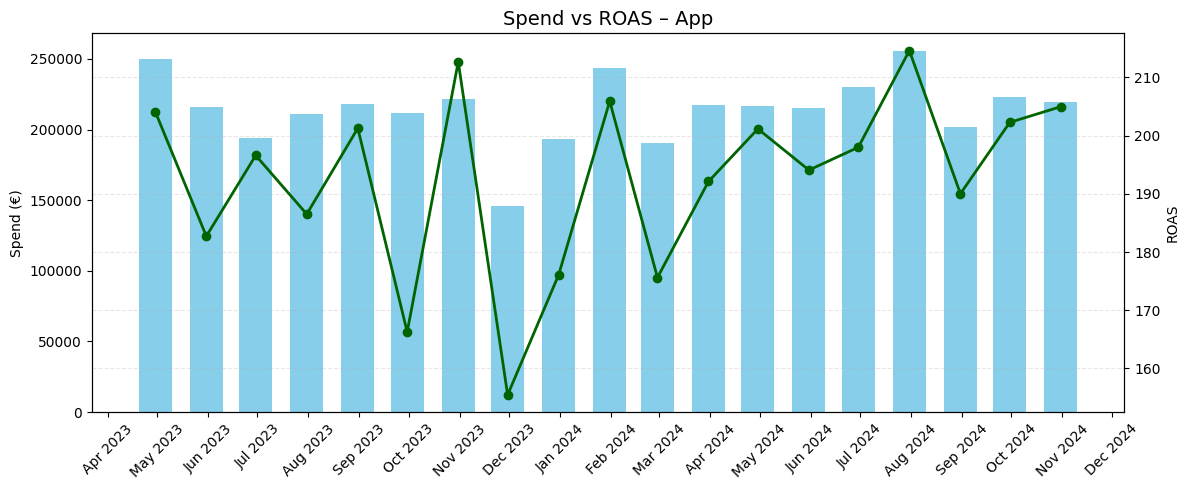

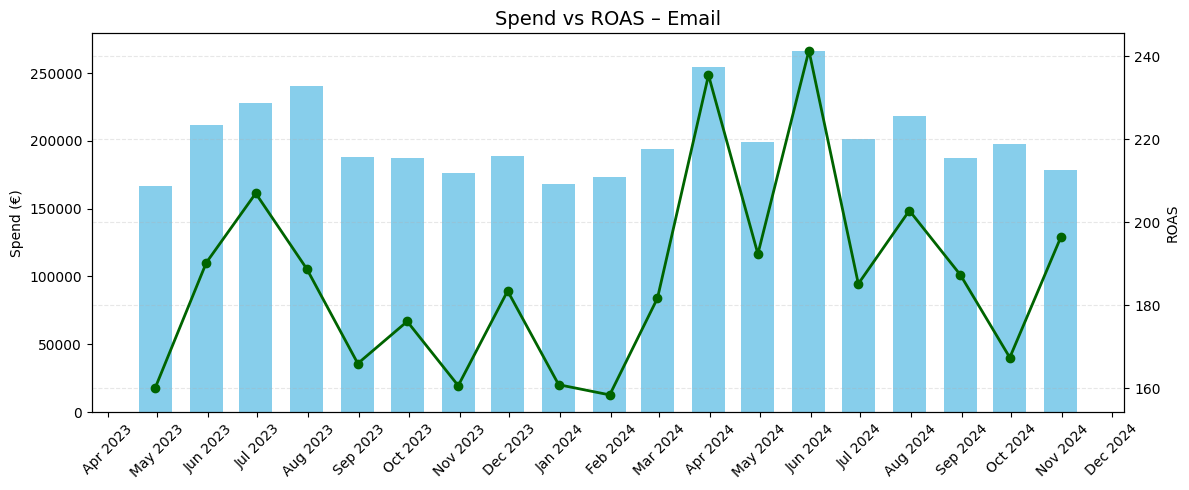

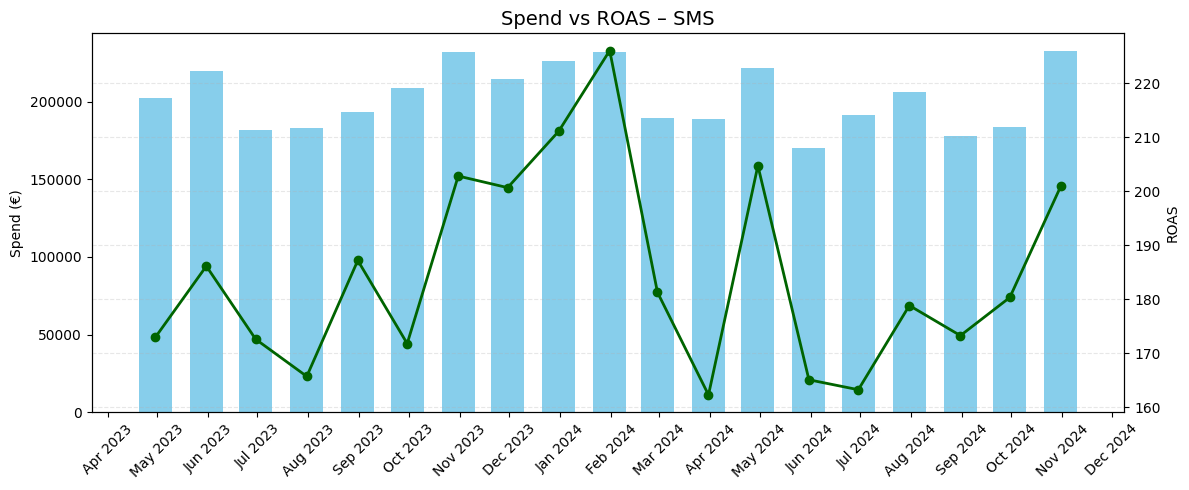

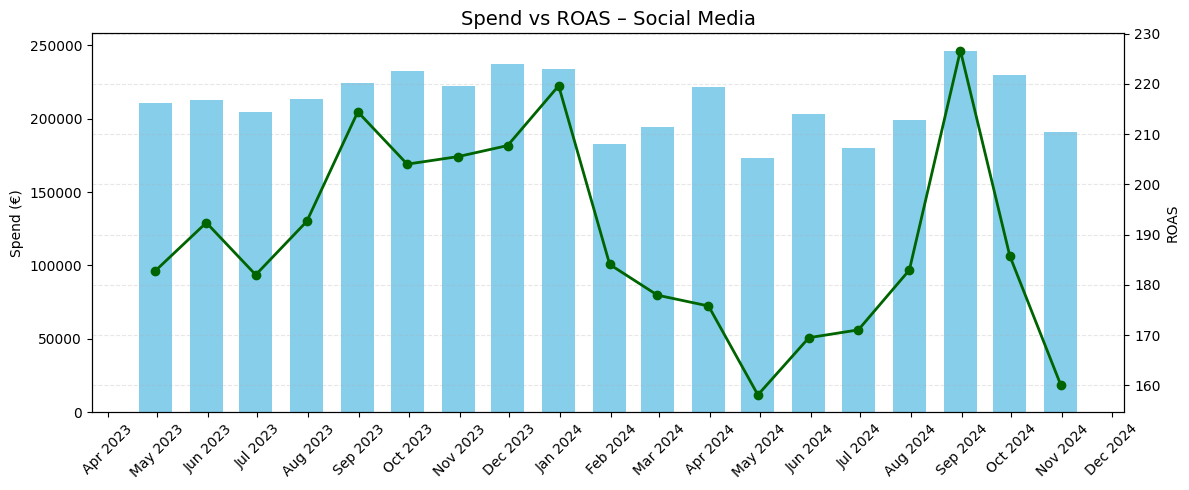

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filtrage des bonnes dates
good_date = (roas_channel_pivot_monthly.index > "2023-03-31") & (roas_channel_pivot_monthly.index < "2024-11-30")

# Liste des canaux
channels = ['App', 'Email', 'SMS', 'Social Media']

# Un graph par canal
for channel in channels:
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Axe principal : Spend en barres
    ax1.bar(
        roas_channel_pivot_monthly[good_date].index,
        roas_channel_pivot_monthly[('spend', channel)][good_date],
        color='skyblue',
        width=20,
        label='Spend (€)',
        align='center'
    )
    ax1.set_ylabel('Spend (€)')
    ax1.tick_params(axis='y')

    # Mise en forme de l'axe des dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)

    # Axe secondaire : ROAS en ligne
    ax2 = ax1.twinx()
    ax2.plot(
        roas_channel_pivot_monthly[good_date].index,
        roas_channel_pivot_monthly[('roas', channel)][good_date],
        color='darkgreen',
        marker='o',
        linewidth=2,
        label='ROAS'
    )
    ax2.set_ylabel('ROAS')
    ax2.tick_params(axis='y')

    # Titre et affichage
    plt.title(f'Spend vs ROAS – {channel}', fontsize=14)
    fig.tight_layout()
    plt.grid(True, which='major', linestyle='--', alpha=0.3)
    plt.show()

## VARIANCE ET COVARIANCE ENTRE SPEND ET ROAS



## APP CHANNEL

Corrélation entre les dépenses et le retour sur investissement pour les campagnes marketing sur App :            spend_app  roas_app
spend_app   1.000000  0.742857
roas_app    0.742857  1.000000


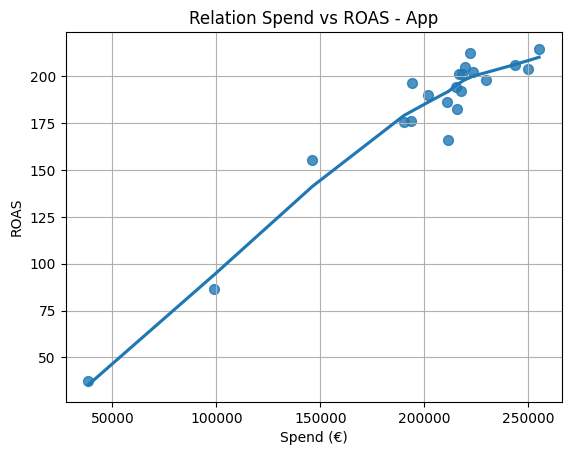

In [53]:
# CORRELATION
roas_app = roas_channel_pivot_monthly[[('spend', 'App'), ('roas', 'App')]]
# Renommer les colonnes pour éviter les tuples
roas_app.columns = ['spend_app', 'roas_app']

print(f"Corrélation entre les dépenses et le retour sur investissement pour les campagnes marketing sur App : {roas_app.corr(method='kendall')}")

# VISUALISATION
sns.regplot(
    data=roas_app,
    x='spend_app',
    y='roas_app',
    lowess=True,
    scatter_kws={'s': 50}
)

plt.title("Relation Spend vs ROAS - App")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()

CONCLUSION : Le spend sur App est fortement et positivement corrélé au ROAS : plus tu investis, plus ton retour sur investissement a tendance à croître.

Il y a une zone optimale de dépenses autour de 200 000 – 220 000 €, où le ROAS plafonne (~200).

Dépenser au-delà de ce seuil ne semble pas augmenter significativement le ROAS → signe possible de saturation ou de perte d'efficacité marginale.

Dépenser moins de 100 000 € donne un ROAS faible, donc pas optimal non plus.

### MODELISATION

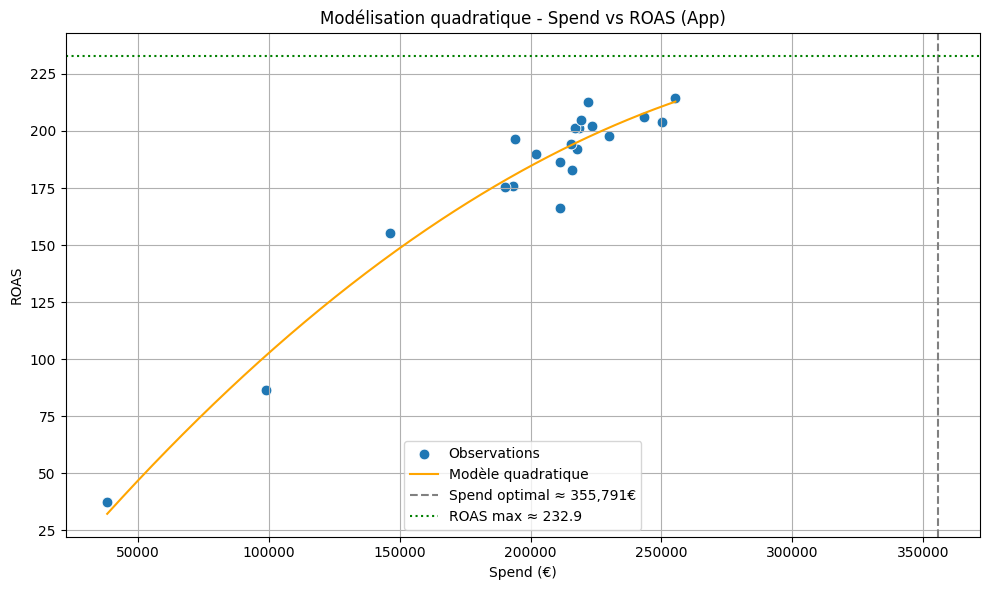

Coefficients du modèle quadratique : a = -1.9905931057765244e-09, b = 0.001416469788249895, c = -19.03672863454935
Spend optimal : 355,791 €
ROAS maximal : 232.9


In [59]:
# Étape 1 : Extraire les variables
x = roas_app['spend_app'].values
y = roas_app['roas_app'].values

# Étape 2 : Ajustement polynômial de degré 2 (quadratique)
coeffs = np.polyfit(x, y, deg=2)  # coeffs = [a, b, c] pour ax² + bx + c
poly_func = np.poly1d(coeffs)

# Étape 3 : Générer une plage de valeurs pour x pour la courbe lisse
x_range = np.linspace(x.min(), x.max(), 300)
y_pred = poly_func(x_range)

# Étape 4 : Trouver le sommet de la parabole (maximum si courbe concave)
x_vertex = -coeffs[1] / (2 * coeffs[0])
y_vertex = poly_func(x_vertex)

# Étape 5 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=60, label='Observations')
plt.plot(x_range, y_pred, color='orange', label='Modèle quadratique')
plt.axvline(x=x_vertex, color='gray', linestyle='--', label=f"Spend optimal ≈ {x_vertex:,.0f}€")
plt.axhline(y=y_vertex, color='green', linestyle=':', label=f"ROAS max ≈ {y_vertex:.1f}")

plt.title("Modélisation quadratique - Spend vs ROAS (App)")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coefficients
print(f"Coefficients du modèle quadratique : a = {coeffs[0]}, b = {coeffs[1]}, c = {coeffs[2]}")
print(f"Spend optimal : {x_vertex:,.0f} €")
print(f"ROAS maximal : {y_vertex:.1f}")

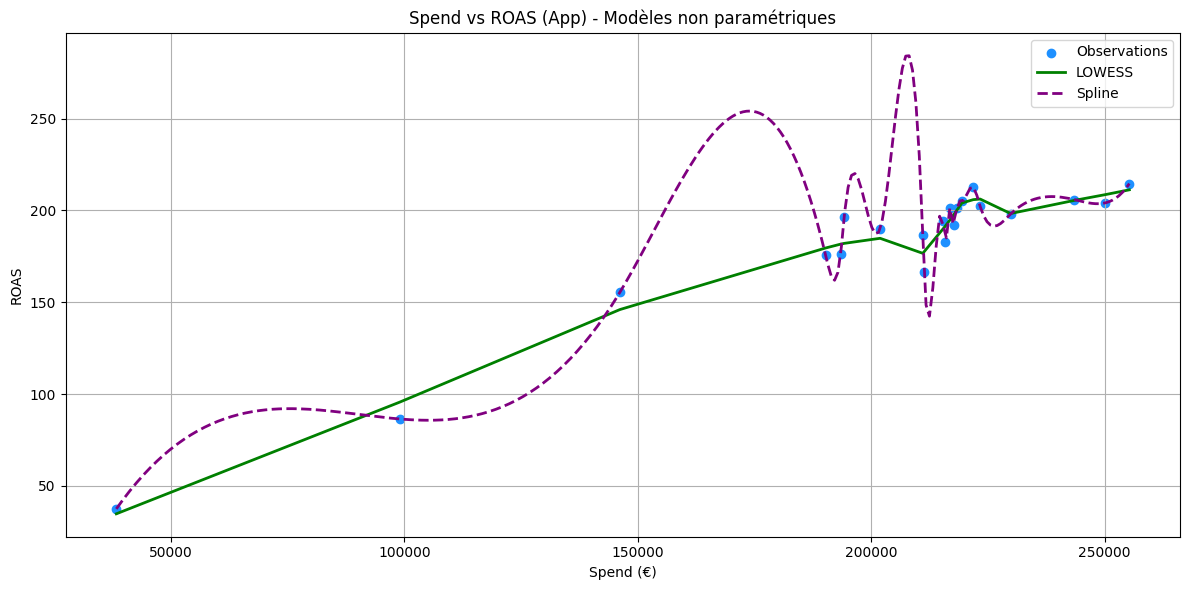

In [84]:
## Modélisation LOWESS (lissage non paramétrique) et Spline (base B-spline ou CubicSpline de scipy) :
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import make_interp_spline

# Exemple : suppose que tu as déjà ces deux colonnes
x = roas_app['spend_app']
y = roas_app['roas_app']

# Préparation de la figure
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Observations', color='dodgerblue')

# === LOWESS ===
lowess_smoothed = lowess(y, x, frac=0.4)
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='green', label='LOWESS', linewidth=2)

# === Spline (interpolation lisse) ===
# On trie les valeurs pour l’interpolation
sorted_idx = np.argsort(x)
x_sorted = x.values[sorted_idx]
y_sorted = y.values[sorted_idx]

# Création du spline
spline = make_interp_spline(x_sorted, y_sorted)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, color='purple', linestyle='--', label='Spline', linewidth=2)

# === Personnalisation du graphique ===
plt.title('Spend vs ROAS (App) - Modèles non paramétriques')
plt.xlabel('Spend (€)')
plt.ylabel('ROAS')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

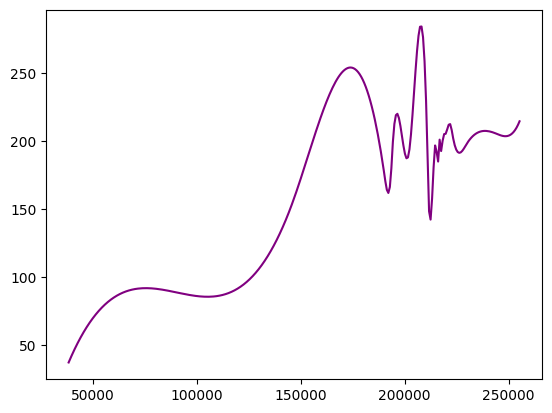

In [61]:
## Modélisation Spline (base B-spline ou CubicSpline de scipy) :

from scipy.interpolate import make_interp_spline

x_sorted_idx = np.argsort(x)
x_sorted = x[x_sorted_idx]
y_sorted = y[x_sorted_idx]

spline = make_interp_spline(x_sorted, y_sorted)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, color='purple', label='Spline')

## Email Channel

Corrélation entre les dépenses et le retour sur investissement pour les campagnes marketing mail :              spend_email  roas_email
spend_email     1.000000    0.714286
roas_email      0.714286    1.000000


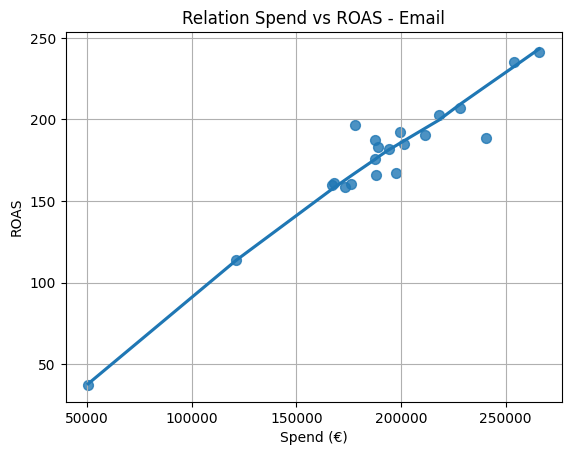

In [76]:
# CORRELATION
roas_email = roas_channel_pivot_monthly[[('spend', 'Email'), ('roas', 'Email')]]
# Renommer les colonnes pour éviter les tuples
roas_email.columns = ['spend_email', 'roas_email']

print(f"Corrélation entre les dépenses et le retour sur investissement pour les campagnes marketing mail : {roas_email.corr(method='kendall')}")

# VISUALISATION
sns.regplot(
    data=roas_email,
    x='spend_email',
    y='roas_email',
    lowess=True,
    scatter_kws={'s': 50}
)

plt.title("Relation Spend vs ROAS - Email")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()

CONCLUSION :   
L’emailing semble particulièrement efficace : il conserve une rentabilité croissante sans plateau évident.

C’est un canal qui supporte bien l’augmentation budgétaire, en tout cas sur la période étudiée.

on peut parler d’optimum empirique dans cette fourchette :

Investir entre 170k€ et 270k€ semble garantir un bon retour (ROAS élevé et stable).

Ce n’est pas une saturation comme pour l’App, mais un palier de performance stable.

Il serait pertinent de modéliser la courbe marginale (ex : dérivée de la fonction ROAS vs Spend) pour déterminer le point de rendement marginal décroissant.

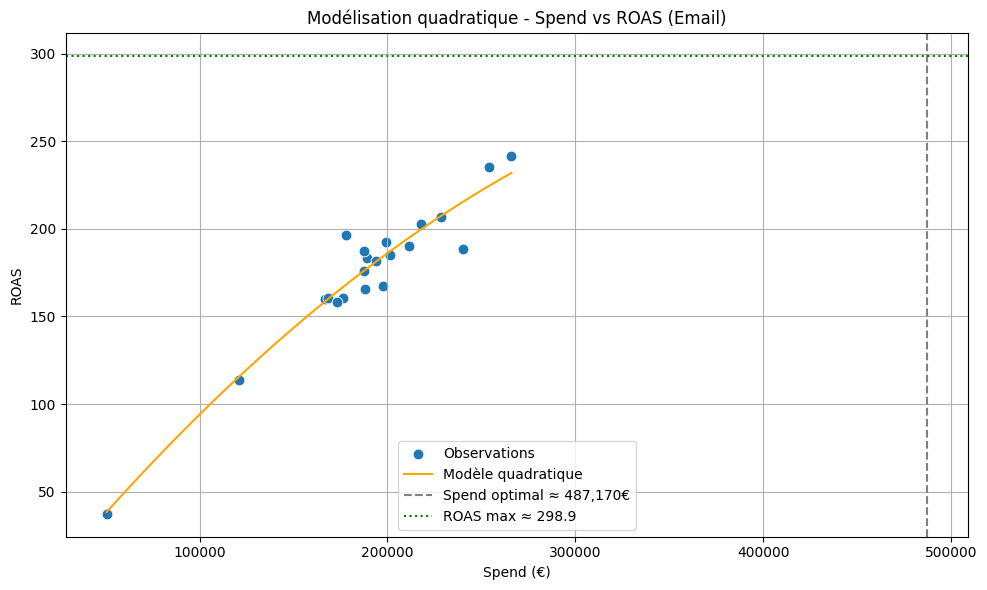

Coefficients du modèle quadratique : a = -1.3666126532847606e-09, b = 0.0013315454125459726, c = -25.468971527124488
Spend optimal : 487,170 €
ROAS maximal : 298.9


In [77]:
# Étape 1 : Extraire les variables
x = roas_email['spend_email'].values
y = roas_email['roas_email'].values

# Étape 2 : Ajustement polynômial de degré 2 (quadratique)
coeffs = np.polyfit(x, y, deg=2)  # coeffs = [a, b, c] pour ax² + bx + c
poly_func = np.poly1d(coeffs)

# Étape 3 : Générer une plage de valeurs pour x pour la courbe lisse
x_range = np.linspace(x.min(), x.max(), 300)
y_pred = poly_func(x_range)

# Étape 4 : Trouver le sommet de la parabole (maximum si courbe concave)
x_vertex = -coeffs[1] / (2 * coeffs[0])
y_vertex = poly_func(x_vertex)

# Étape 5 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=60, label='Observations')
plt.plot(x_range, y_pred, color='orange', label='Modèle quadratique')
plt.axvline(x=x_vertex, color='gray', linestyle='--', label=f"Spend optimal ≈ {x_vertex:,.0f}€")
plt.axhline(y=y_vertex, color='green', linestyle=':', label=f"ROAS max ≈ {y_vertex:.1f}")

plt.title("Modélisation quadratique - Spend vs ROAS (Email)")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coefficients
print(f"Coefficients du modèle quadratique : a = {coeffs[0]}, b = {coeffs[1]}, c = {coeffs[2]}")
print(f"Spend optimal : {x_vertex:,.0f} €")
print(f"ROAS maximal : {y_vertex:.1f}")

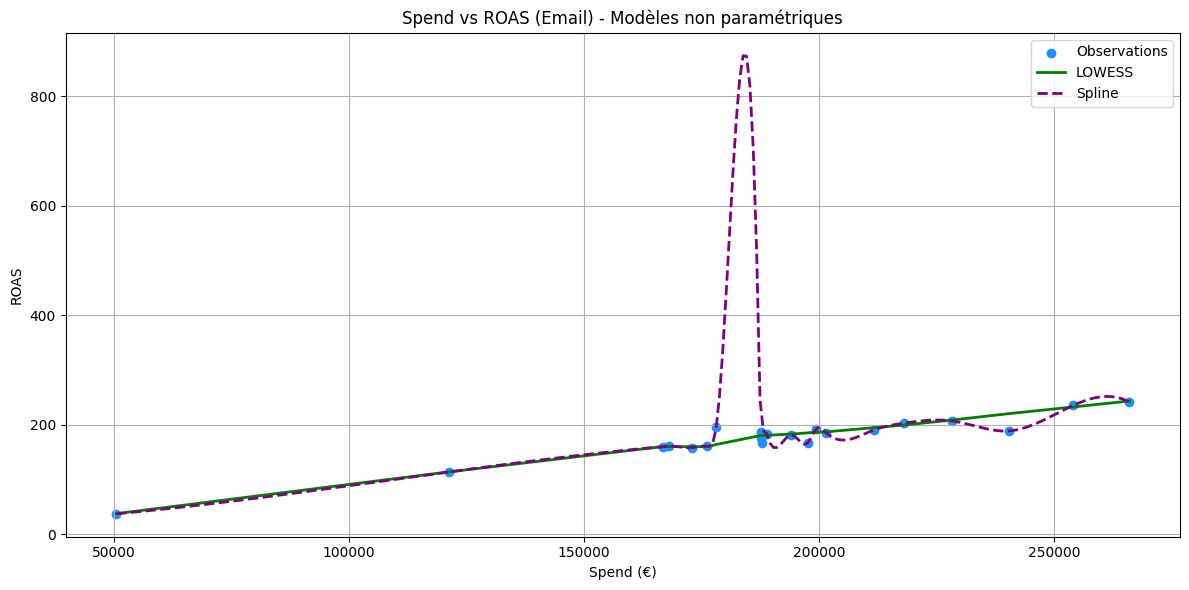

In [81]:
## Modélisation LOWESS (lissage non paramétrique) et Spline (base B-spline ou CubicSpline de scipy) :
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import make_interp_spline

# Exemple : suppose que tu as déjà ces deux colonnes
x = roas_email['spend_email']
y = roas_email['roas_email']

# Préparation de la figure
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Observations', color='dodgerblue')

# === LOWESS ===
lowess_smoothed = lowess(y, x, frac=0.4)
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='green', label='LOWESS', linewidth=2)

# === Spline (interpolation lisse) ===
# On trie les valeurs pour l’interpolation
sorted_idx = np.argsort(x)
x_sorted = x.values[sorted_idx]
y_sorted = y.values[sorted_idx]

# Création du spline
spline = make_interp_spline(x_sorted, y_sorted)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, color='purple', linestyle='--', label='Spline', linewidth=2)

# === Personnalisation du graphique ===
plt.title('Spend vs ROAS (Email) - Modèles non paramétriques')
plt.xlabel('Spend (€)')
plt.ylabel('ROAS')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## SMS

Corrélation entre les dépenses et le retour sur investissement pour les campagnes marketing SMS :            spend_sms  roas_sms
spend_sms   1.000000  0.647619
roas_sms    0.647619  1.000000


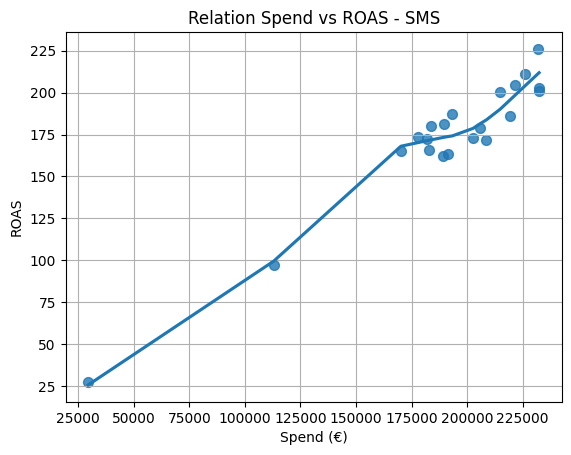

In [62]:
# CORRELATION
roas_sms = roas_channel_pivot_monthly[[('spend', 'SMS'), ('roas', 'SMS')]]
# Renommer les colonnes pour éviter les tuples
roas_sms.columns = ['spend_sms', 'roas_sms']

print(f"Corrélation entre les dépenses et le retour sur investissement pour les campagnes marketing SMS : {roas_sms.corr(method='kendall')}")

# VISUALISATION
sns.regplot(
    data=roas_sms,
    x='spend_sms',
    y='roas_sms',
    lowess=True,
    scatter_kws={'s': 50}
)

plt.title("Relation Spend vs ROAS - SMS")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()

CONCLUSION :    
Corrélation linéaire (moins évidente que pour l'email et l'App) avec une zone optimale de dépenses autour de 170000 et 225000.

### MODELISATION

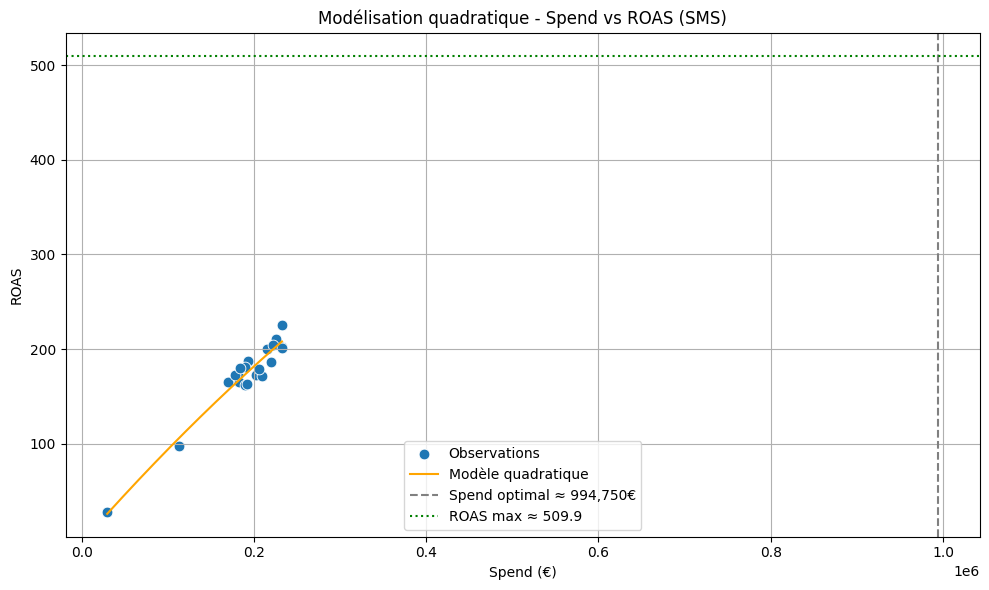

Coefficients du modèle quadratique : a = -5.191988623303372e-10, b = 0.001032945666683067, c = -3.8825602358742435
Spend optimal : 994,750 €
ROAS maximal : 509.9


In [73]:
# Étape 1 : Extraire les variables
x = roas_sms['spend_sms'].values
y = roas_sms['roas_sms'].values

# Étape 2 : Ajustement polynômial de degré 2 (quadratique)
coeffs = np.polyfit(x, y, deg=2)  # coeffs = [a, b, c] pour ax² + bx + c
poly_func = np.poly1d(coeffs)

# Étape 3 : Générer une plage de valeurs pour x pour la courbe lisse
x_range = np.linspace(x.min(), x.max(), 300)
y_pred = poly_func(x_range)

# Étape 4 : Trouver le sommet de la parabole (maximum si courbe concave)
x_vertex = -coeffs[1] / (2 * coeffs[0])
y_vertex = poly_func(x_vertex)

# Étape 5 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=60, label='Observations')
plt.plot(x_range, y_pred, color='orange', label='Modèle quadratique')
plt.axvline(x=x_vertex, color='gray', linestyle='--', label=f"Spend optimal ≈ {x_vertex:,.0f}€")
plt.axhline(y=y_vertex, color='green', linestyle=':', label=f"ROAS max ≈ {y_vertex:.1f}")

plt.title("Modélisation quadratique - Spend vs ROAS (SMS)")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coefficients
print(f"Coefficients du modèle quadratique : a = {coeffs[0]}, b = {coeffs[1]}, c = {coeffs[2]}")
print(f"Spend optimal : {x_vertex:,.0f} €")
print(f"ROAS maximal : {y_vertex:.1f}")

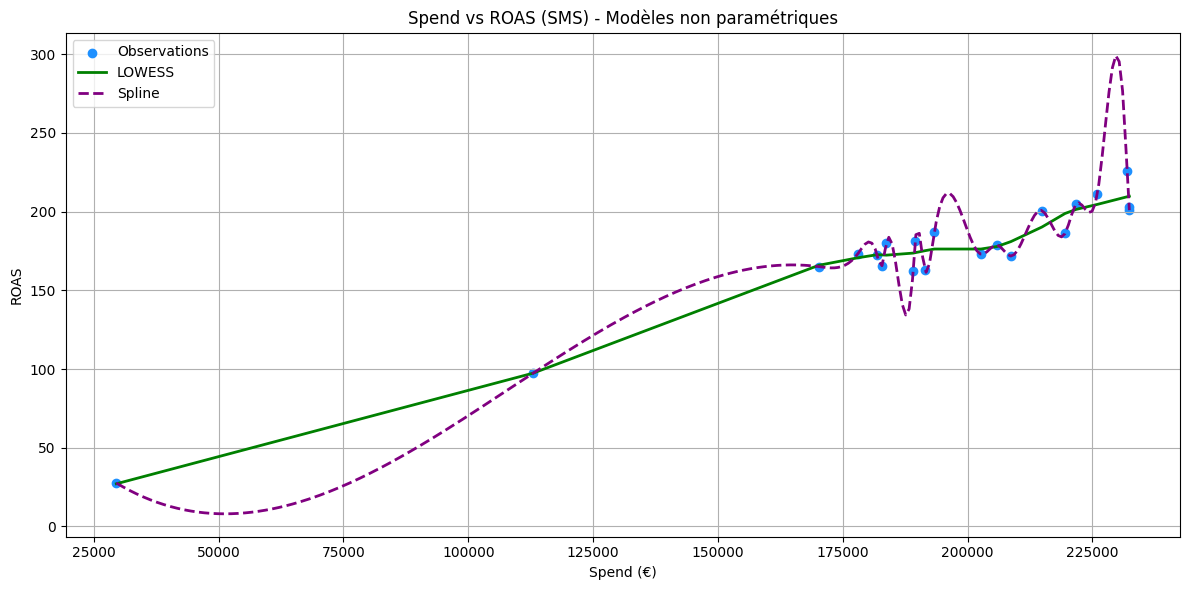

In [82]:
## Modélisation LOWESS (lissage non paramétrique) et Spline (base B-spline ou CubicSpline de scipy) :
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import make_interp_spline

# Exemple : suppose que tu as déjà ces deux colonnes
x = roas_sms['spend_sms']
y = roas_sms['roas_sms']

# Préparation de la figure
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Observations', color='dodgerblue')

# === LOWESS ===
lowess_smoothed = lowess(y, x, frac=0.4)
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='green', label='LOWESS', linewidth=2)

# === Spline (interpolation lisse) ===
# On trie les valeurs pour l’interpolation
sorted_idx = np.argsort(x)
x_sorted = x.values[sorted_idx]
y_sorted = y.values[sorted_idx]

# Création du spline
spline = make_interp_spline(x_sorted, y_sorted)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, color='purple', linestyle='--', label='Spline', linewidth=2)

# === Personnalisation du graphique ===
plt.title('Spend vs ROAS (SMS) - Modèles non paramétriques')
plt.xlabel('Spend (€)')
plt.ylabel('ROAS')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## SOCIAL MEDIA CHANNEL

Corrélation entre les dépenses et le retour sur investissement pour les campagnes de Social Media :            spend_sms  roas_sms
spend_sms   1.000000  0.647619
roas_sms    0.647619  1.000000


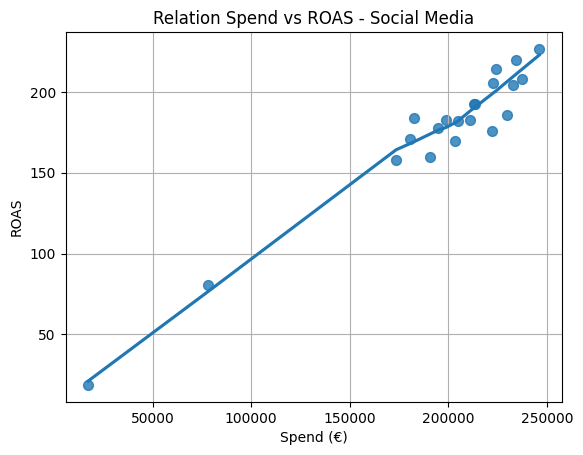

In [66]:
# CORRELATION
roas_SM = roas_channel_pivot_monthly[[('spend', 'Social Media'), ('roas', 'Social Media')]]
# Renommer les colonnes pour éviter les tuples
roas_SM.columns = ['spend_SM', 'roas_SM']

print(f"Corrélation entre les dépenses et le retour sur investissement pour les campagnes de Social Media : {roas_sms.corr(method='kendall')}")

# VISUALISATION
sns.regplot(
    data=roas_SM,
    x='spend_SM',
    y='roas_SM',
    lowess=True,
    scatter_kws={'s': 50}
)

plt.title("Relation Spend vs ROAS - Social Media")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.grid(True)
plt.show()

### MODELISATION SOCIAL MEDIA

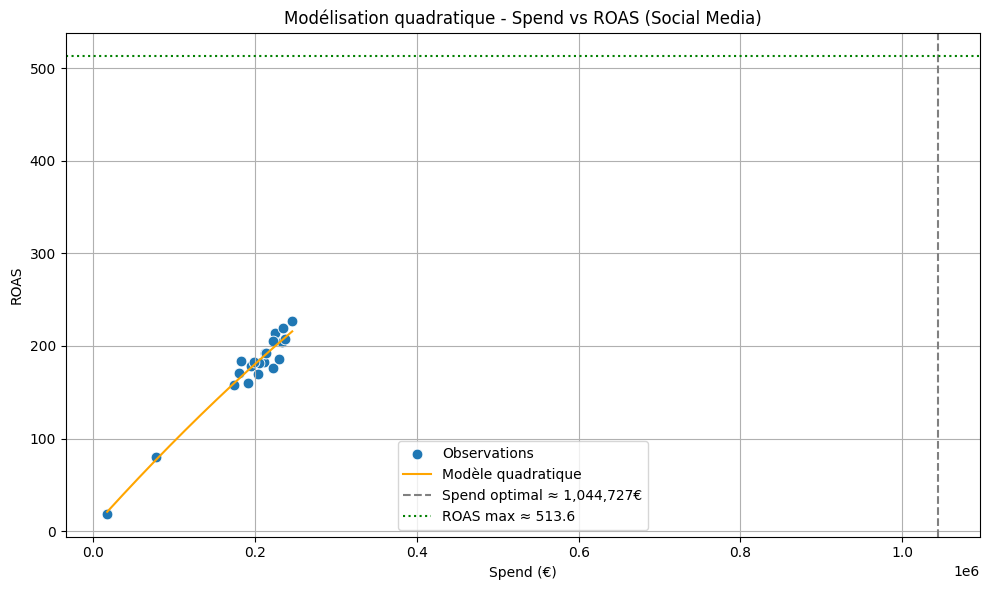

Coefficients du modèle quadratique : a = -4.668313626942899e-10, b = 0.0009754226129868663, c = 4.071813786220753
Spend optimal : 1,044,727 €
ROAS maximal : 513.6


In [70]:
# Étape 1 : Extraire les variables
x = roas_SM['spend_SM'].values
y = roas_SM['roas_SM'].values

# Étape 2 : Ajustement polynômial de degré 2 (quadratique)
coeffs = np.polyfit(x, y, deg=2)  # coeffs = [a, b, c] pour ax² + bx + c
poly_func = np.poly1d(coeffs)

# Étape 3 : Générer une plage de valeurs pour x pour la courbe lisse
x_range = np.linspace(x.min(), x.max(), 300)
y_pred = poly_func(x_range)

# Étape 4 : Trouver le sommet de la parabole (maximum si courbe concave)
x_vertex = -coeffs[1] / (2 * coeffs[0])
y_vertex = poly_func(x_vertex)

# Étape 5 : Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, s=60, label='Observations')
plt.plot(x_range, y_pred, color='orange', label='Modèle quadratique')
plt.axvline(x=x_vertex, color='gray', linestyle='--', label=f"Spend optimal ≈ {x_vertex:,.0f}€")
plt.axhline(y=y_vertex, color='green', linestyle=':', label=f"ROAS max ≈ {y_vertex:.1f}")

plt.title("Modélisation quadratique - Spend vs ROAS (Social Media)")
plt.xlabel("Spend (€)")
plt.ylabel("ROAS")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coefficients
print(f"Coefficients du modèle quadratique : a = {coeffs[0]}, b = {coeffs[1]}, c = {coeffs[2]}")
print(f"Spend optimal : {x_vertex:,.0f} €")
print(f"ROAS maximal : {y_vertex:.1f}")

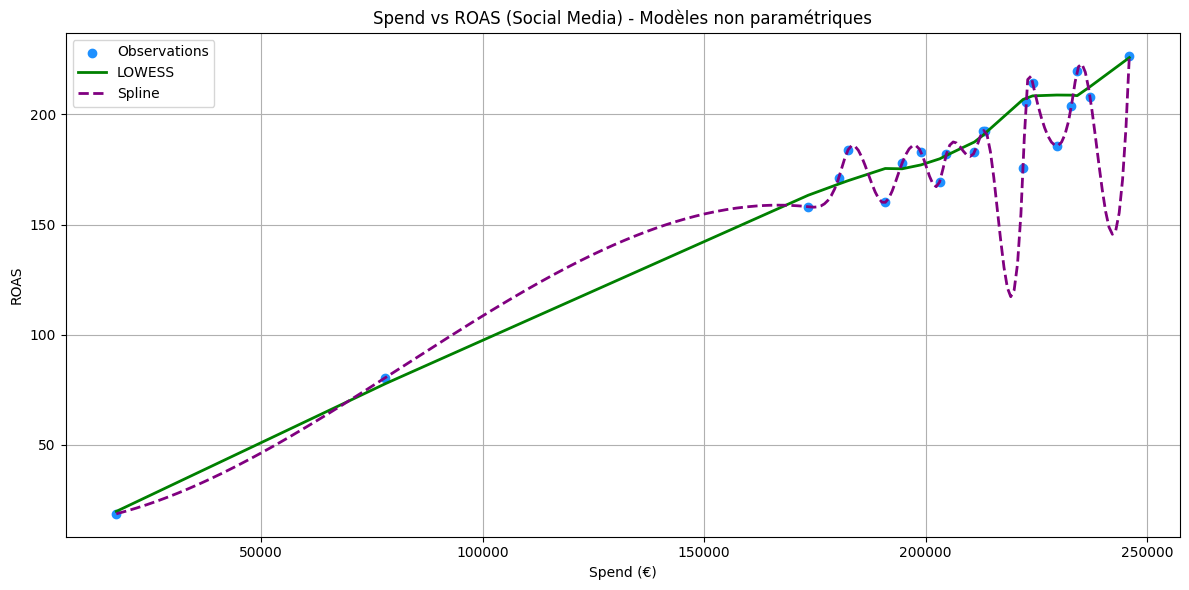

In [83]:
## Modélisation LOWESS (lissage non paramétrique) et Spline (base B-spline ou CubicSpline de scipy) :
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import make_interp_spline

# Exemple : suppose que tu as déjà ces deux colonnes
x = roas_SM['spend_SM']
y = roas_SM['roas_SM']

# Préparation de la figure
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Observations', color='dodgerblue')

# === LOWESS ===
lowess_smoothed = lowess(y, x, frac=0.4)
plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='green', label='LOWESS', linewidth=2)

# === Spline (interpolation lisse) ===
# On trie les valeurs pour l’interpolation
sorted_idx = np.argsort(x)
x_sorted = x.values[sorted_idx]
y_sorted = y.values[sorted_idx]

# Création du spline
spline = make_interp_spline(x_sorted, y_sorted)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, color='purple', linestyle='--', label='Spline', linewidth=2)

# === Personnalisation du graphique ===
plt.title('Spend vs ROAS (Social Media) - Modèles non paramétriques')
plt.xlabel('Spend (€)')
plt.ylabel('ROAS')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# MONTHLY ROAS BY CHANNEL

In [14]:
# Creating a pivot table with date as index and channel as column
cac_channel_pivot = df_kpi.pivot_table(
    values=["CAC", "spend"],
    columns="channel",
    index="date",
    aggfunc={"CAC": "mean", "spend": "sum"}
).round(2)
cac_channel_pivot

CAC                                  spend                      \
channel       App   Email     SMS Social Media       App     Email       SMS   
date                                                                           
2023-03-17  72.93  166.58   24.23        64.11   6484.09   8931.97   1090.49   
2023-03-18  41.91   89.37     NaN       111.63  11376.84   3217.48       NaN   
2023-03-19  43.69   34.68  189.85       107.14   9105.78   5714.53   6332.95   
2023-03-20  29.80   35.23   84.31          NaN   1400.73   3544.77  26119.48   
2023-03-21  87.44   67.11   27.16        16.45  11643.16   8071.53   6035.79   
...           ...     ...     ...          ...       ...       ...       ...   
2024-11-01  80.80  103.74   20.95          NaN   6028.88  17363.83   3858.44   
2024-11-02  91.94   88.10   67.21       201.02   9263.82   2202.62  10140.27   
2024-11-03  57.08   53.87     NaN        44.64   4337.91  20031.12       NaN   
2024-11-04  27.86     NaN  151.89        54.13  10025.65       NaN   7074.82   
2024-11-05  62.12   94.07   74.50        21.44   8652.97  10997.98   8431.43   

                         
channel    Social Media  
date                     
2023-03-17      9119.55  
2023-03-18     12568.77  
2023-03-19      6753.07  
2023-03-20          NaN  
2023-03-21      1266.57  
...                 ...  
2024-11-01          NaN  
2024-11-02      3819.45  
2024-11-03      5076.65  
2024-11-04      6964.56  
2024-11-05      1457.88  

[600 rows x 8 columns]

In [15]:
# Transform date column into date type
cac_channel_pivot.index = pd.to_datetime(cac_channel_pivot.index, format="%Y-%m-%d", errors='coerce')

In [16]:
# Change cac_channel_pivot into monthly results

cac_channel_pivot_monthly = cac_channel_pivot.resample("ME").sum()
cac_channel_pivot_monthly

CAC                                     spend             \
channel         App    Email      SMS Social Media        App      Email   
date                                                                       
2023-03-31   820.75  1062.44   812.85       885.31   99052.54  121242.67   
2023-04-30  2444.86  2040.97  1798.22      2358.41  250133.78  166883.13   
2023-05-31  3230.96  2168.02  2906.47      2527.18  215824.88  211601.98   
2023-06-30  2166.02  1696.14  1865.44      2574.37  194232.42  228254.99   
2023-07-31  2356.00  1809.84  2139.38      2300.79  211062.49  240422.02   
2023-08-31  2240.77  2205.90  1767.93      2000.10  218356.00  187927.36   
2023-09-30  1900.80  2207.83  2109.90      2147.57  211366.12  187607.13   
2023-10-31  2438.64  1807.58  2753.66      1877.85  221879.11  176276.48   
2023-11-30  1423.27  1946.62  2349.80      2478.32  146185.37  188900.70   
2023-12-31  2643.62  2057.45  2520.46      2337.04  193461.44  168197.59   
2024-01-31  2122.17  2125.62  1750.25      1977.14  243496.08  173067.17   
2024-02-29  2096.91  1585.36  2259.32      2116.00  190248.35  194114.68   
2024-03-31  1984.62  2268.11  2056.06      2869.43  217694.74  254078.80   
2024-04-30  2733.99  1808.17  1996.41      1560.58  216851.94  199365.44   
2024-05-31  2649.07  2347.54  2128.16      2283.60  215323.46  265968.70   
2024-06-30  2421.87  1859.10  2224.03      2479.78  229866.14  201559.46   
2024-07-31  2103.47  2373.44  2379.53      2604.32  255313.99  217996.98   
2024-08-31  2083.37  2234.79  1802.10      2224.23  201926.31  187582.03   
2024-09-30  2487.20  2489.69  2026.98      2288.34  223345.94  197677.90   
2024-10-31  2150.22  2004.41  2452.35      1587.83  219448.42  178167.28   
2024-11-30   319.80   339.78   314.55       321.23   38309.23   50595.55   

                                    
channel           SMS Social Media  
date                                
2023-03-31  112979.06     78059.04  
2023-04-30  202672.73    211017.06  
2023-05-31  219519.94    212940.58  
2023-06-30  181871.82    204701.32  
2023-07-31  182876.05    213440.04  
2023-08-31  193372.51    224163.64  
2023-09-30  208674.72    232929.39  
2023-10-31  232255.42    222643.71  
2023-11-30  214897.77    237134.81  
2023-12-31  225975.06    234218.31  
2024-01-31  231912.04    182537.74  
2024-02-29  189513.87    194711.42  
2024-03-31  189097.40    222011.00  
2024-04-30  221742.75    173489.67  
2024-05-31  170215.30    203195.14  
2024-06-30  191424.26    180383.48  
2024-07-31  205910.24    198958.27  
2024-08-31  178030.78    245995.92  
2024-09-30  183759.08    229625.76  
2024-10-31  232401.78    190889.07  
2024-11-30   29504.96     17318.54

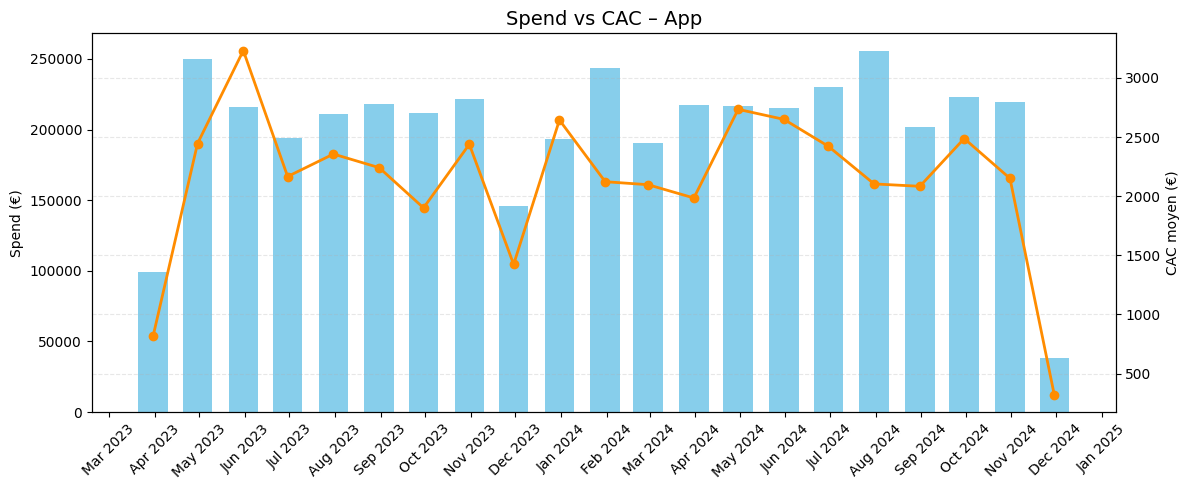

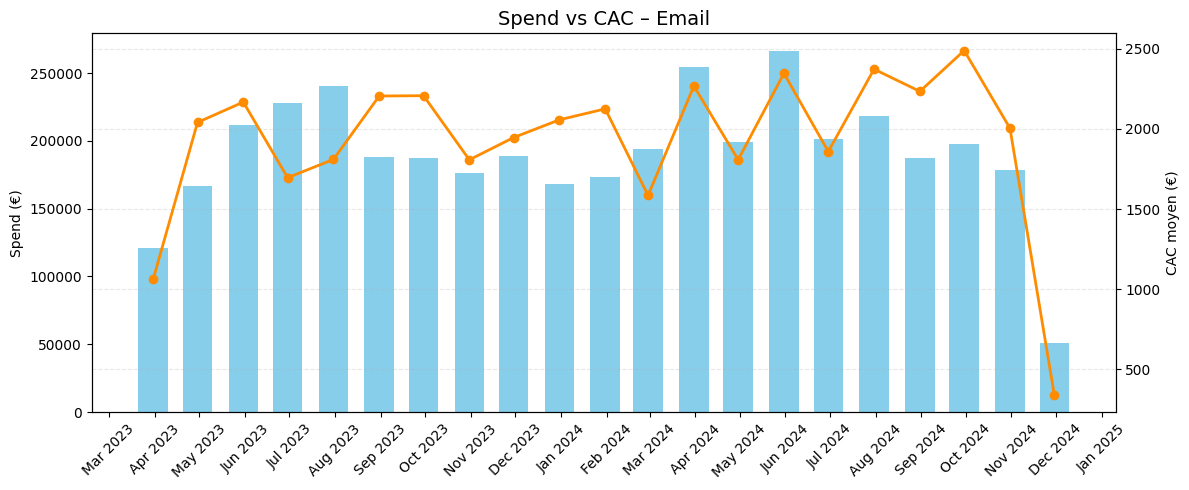

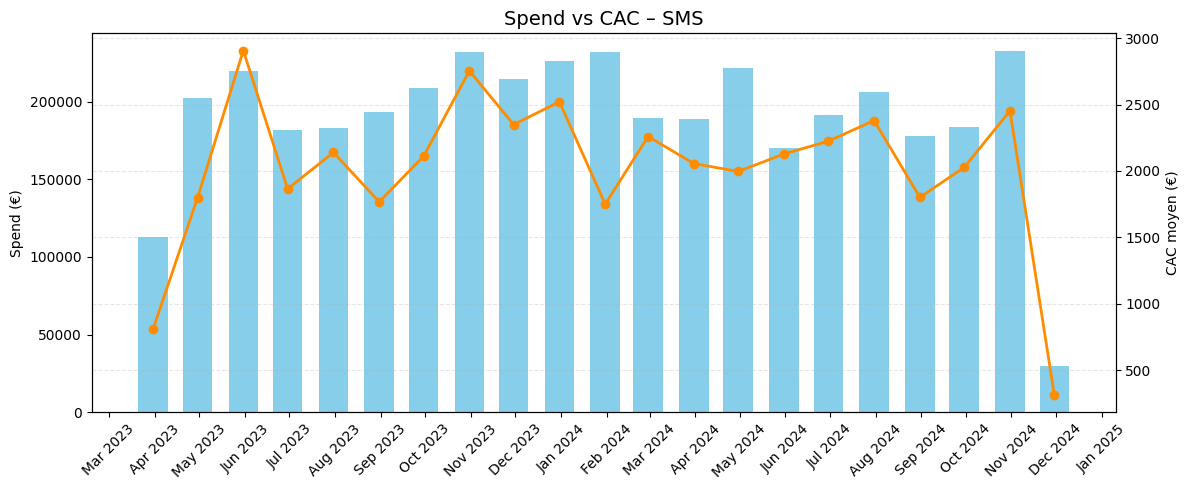

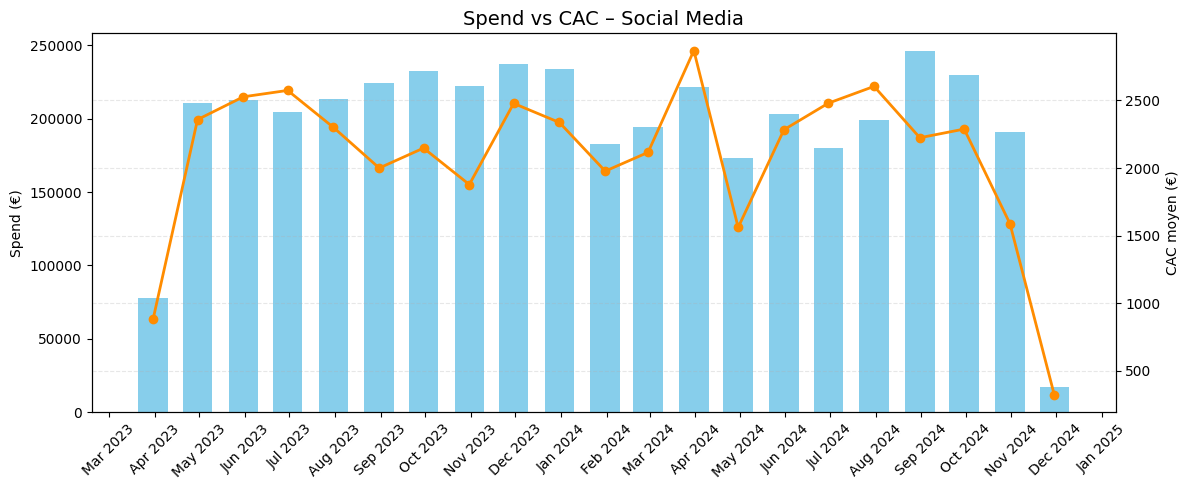

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Liste des canaux
channels = ['App', 'Email', 'SMS', 'Social Media']

# Un graph par canal
for channel in channels:
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Axe principal : Spend en barres
    ax1.bar(
        cac_channel_pivot_monthly.index,
        cac_channel_pivot_monthly[('spend', channel)],
        color='skyblue',
        width=20,  # largeur des barres en jours
        label='Spend (€)',
        align='center'
    )
    ax1.set_ylabel('Spend (€)')
    ax1.tick_params(axis='y')

    # Affichage des mois bien formatés
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator())
    plt.xticks(rotation=45)

    # Axe secondaire : CAC en ligne
    ax2 = ax1.twinx()
    ax2.plot(
        cac_channel_pivot_monthly.index,
        cac_channel_pivot_monthly[('CAC', channel)],
        color='darkorange',
        marker='o',
        linewidth=2,
        label='CAC moyen (€)'
    )
    ax2.set_ylabel('CAC moyen (€)')
    ax2.tick_params(axis='y')

    # Titre et affichage
    plt.title(f'Spend vs CAC – {channel}', fontsize=14)
    fig.tight_layout()
    plt.grid(True, which='major', linestyle='--', alpha=0.3)
    plt.show()